<a href="https://colab.research.google.com/github/Golboojamshidi/INSE6220-Final-project/blob/main/Pizzadataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**PyCaret as a multiclassification tool**

PyCaret's classification module ( pycaret. classification ) is a supervised machine learning module which is used for classifying the elements into binary or multinomial groups based on various techniques and algorithms. The PyCaret classification module can be used for Binary or Multi-class classification problems.

In [ ]:

# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()
     

'2.3.6'

Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
     

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)


Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset Description**

The dataset which is used in this project is Pizza nutritional analysis. component. By looking precise on Pizza gradiant, there are several components in pizza which make your meal delicous or not.The pizza data set contains measurements for the elements that contribute to the taste of a pizza. these components are as below

**mois** – The amount of water in the sample per 100 grammes.

**prot** — The amount of protein in the sample per 100 grammes.

**fat** — The amount of fat in the sample per 100 grammes.

**ash** — The amount of ash in the sample per 100 grammes.

**sodium** — The amount of sodium in 100 grammes of sample.

**carb** — Carbohydrate content per 100 grammes of sample.

**cal** — The number of calories in 100 grammes of sample.

another variable in this dataset is Pizza's brands, which represent different providers who contributes to making delicious pizzas. In this study we considere them as  classes. these labels used to be A, B, C, D, E, F, G, H, I,J which were changed by 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 respectively.
the datasets were obtained from below links:

https://data.world/sdhilip/pizza-datasets

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('/content/Pizza.csv')
df.head(25)

class   Mois   Prot    Fat   Ash  Sodium  Carb   Cal
0       1  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1       1  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2       1  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3       1  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4       1  30.49  21.28  41.65  4.82    1.64  1.76  4.67
5       1  31.14  20.23  42.31  4.92    1.65  1.40  4.67
6       1  31.21  20.97  41.34  4.71    1.58  1.77  4.63
7       1  28.76  21.41  41.60  5.28    1.75  2.95  4.72
8       1  28.22  20.48  45.10  5.02    1.71  1.18  4.93
9       1  27.72  21.19  45.29  5.16    1.66  0.64  4.95
10      1  27.35  21.20  45.59  4.94    1.65  0.92  4.98
11      1  26.98  21.20  45.03  5.15    1.67  1.64  4.97
12      1  28.70  20.00  45.12  4.93    1.56  1.25  4.91
13      1  30.91  19.65  42.45  4.81    1.65  2.81  4.72
14      1  30.91  20.77  42.03  4.90    1.61  1.39  4.67
15      1  30.83  17.88  44.33  5.26    1.76  1.70  4.77
16      1  32.73  20.06  39.74  5.24    1.69  2.23  4.47
17      1  34.58  17.53  40.87  5.05    1.61  1.97  4.46
18      1  31.80  20.35  40.44  5.43    1.61  1.98  4.53
19      1  31.02  19.05  42.29  5.27    1.71  2.37  4.66
20      1  27.02  19.56  47.20  4.95    1.65  1.27  5.08
21      1  27.78  20.01  45.59  4.97    1.70  1.65  4.97
22      1  30.88  20.58  42.26  4.96    1.63  1.32  4.68
23      1  32.20  19.25  43.42  4.62    1.50  0.51  4.70
24      1  33.19  18.05  41.88  5.22    1.70  1.66  4.56

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   300 non-null    int64  
 1   Mois    300 non-null    float64
 2   Prot    300 non-null    float64
 3   Fat     300 non-null    float64
 4   Ash     300 non-null    float64
 5   Sodium  300 non-null    float64
 6   Carb    300 non-null    float64
 7   Cal     300 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [ ]:

print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  5


In [ ]:

print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis:**

In statistics, exploratory data analysis analyses data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

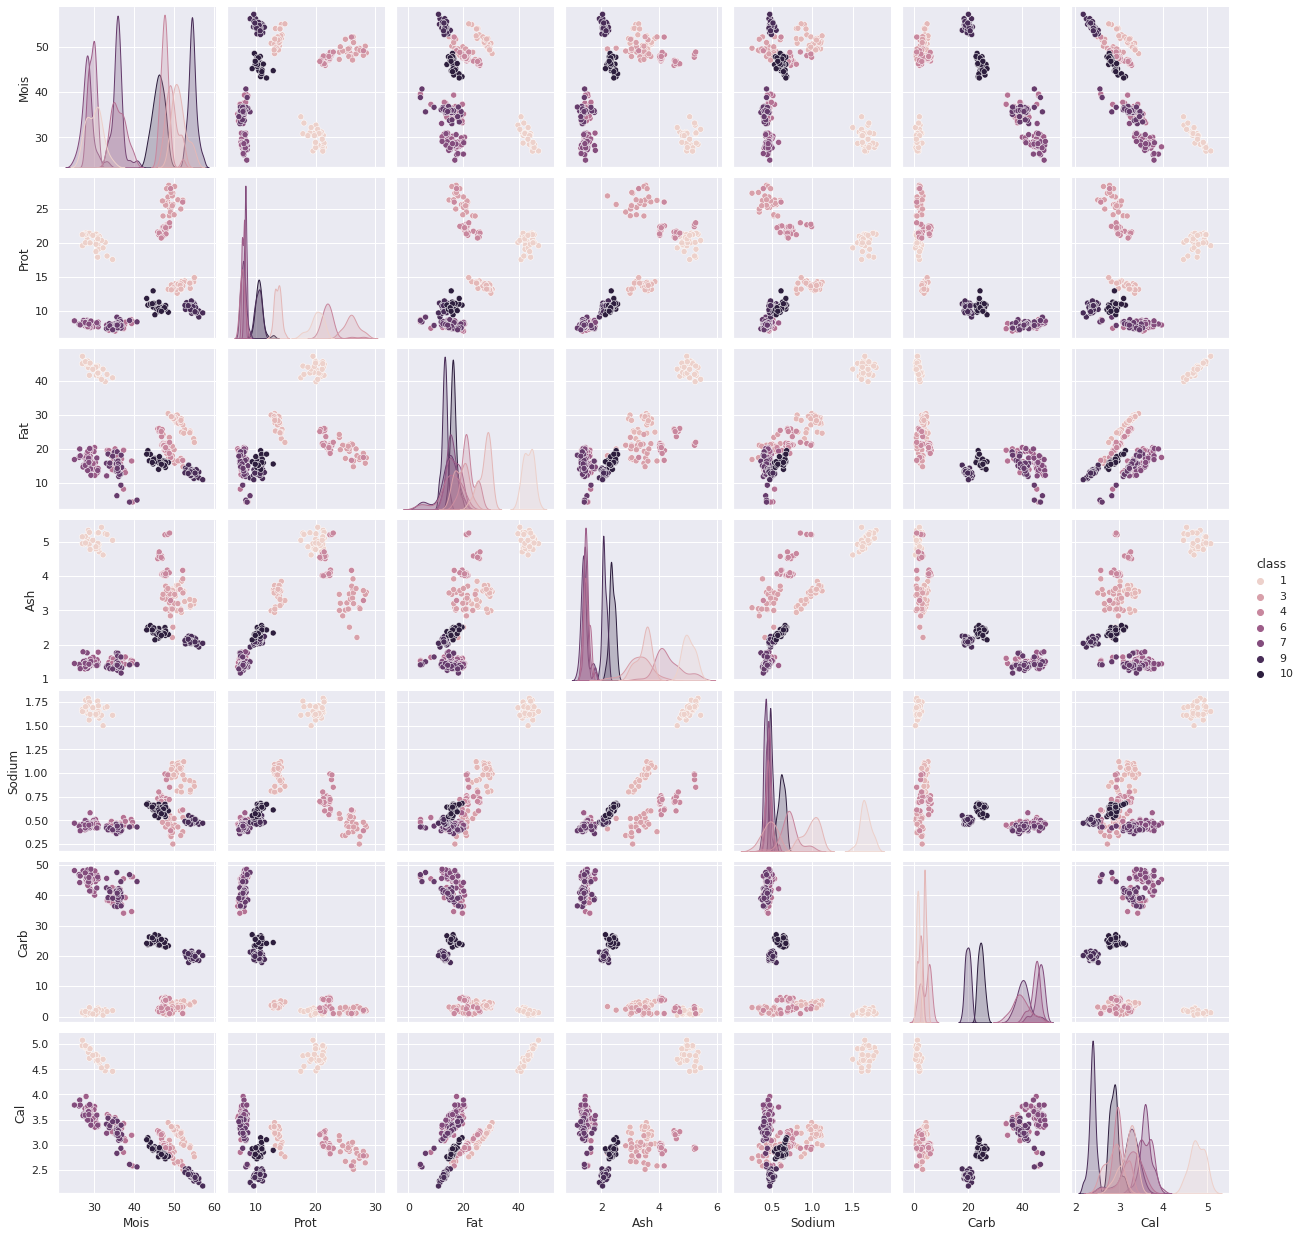

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

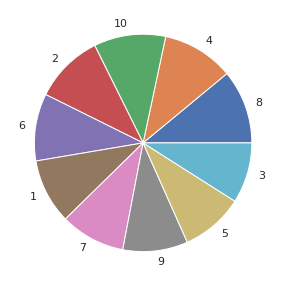

In [ ]:

y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data matrix**

In [ ]:

X = df.drop(columns=['class'])
X.head(10)

Mois   Prot    Fat   Ash  Sodium  Carb   Cal
0  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4  30.49  21.28  41.65  4.82    1.64  1.76  4.67
5  31.14  20.23  42.31  4.92    1.65  1.40  4.67
6  31.21  20.97  41.34  4.71    1.58  1.77  4.63
7  28.76  21.41  41.60  5.28    1.75  2.95  4.72
8  28.22  20.48  45.10  5.02    1.71  1.18  4.93
9  27.72  21.19  45.29  5.16    1.66  0.64  4.95

**Descriptive statistics**


In [ ]:

X.describe().transpose()

count       mean        std    min      25%     50%      75%    max
Mois    300.0  40.903067   9.552987  25.00  30.9025  43.300  49.1150  57.22
Prot    300.0  13.373567   6.434392   6.98   8.0600  10.440  20.0225  28.48
Fat     300.0  20.229533   8.975658   4.38  14.7700  17.135  21.4350  47.20
Ash     300.0   2.633233   1.269724   1.17   1.4500   2.225   3.5925   5.43
Sodium  300.0   0.669400   0.370358   0.25   0.4500   0.490   0.7025   1.79
Carb    300.0  22.864767  18.029722   0.51   3.4675  23.245  41.3375  48.64
Cal     300.0   3.271000   0.620034   2.18   2.9100   3.215   3.5200   5.08

**Standardize the Data**


In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)
     

Mois      Prot       Fat       Ash    Sodium      Carb       Cal
0 -1.371815  1.254181  2.749841  1.953894  2.976687 -1.227511  2.680129
1 -1.301562  1.227717  2.640475  2.135338  3.030779 -1.213622  2.534733
2 -1.316242  1.030010  2.851396  1.930227  2.598042 -1.225844  2.712439
3 -1.085563  1.054918  2.555660  1.701449  2.543950 -1.193622  2.373183
4 -1.091854  1.230830  2.390494  1.725116  2.625088 -1.172510  2.260097
5 -1.023699  1.067372  2.464149  1.804005  2.652134 -1.192510  2.260097
6 -1.016359  1.182571  2.355898  1.638338  2.462812 -1.171954  2.195477
7 -1.273252  1.251068  2.384914  2.088005  2.922595 -1.106398  2.340872
8 -1.329873  1.106290  2.775509  1.882894  2.814410 -1.204733  2.680129
9 -1.382300  1.216819  2.796713  1.993338  2.679180 -1.234733  2.712439

In [ ]:

X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
Mois    300.0 -1.184238e-16  1.001671 -1.667503 -1.048601  0.251329  0.861056   
Prot    300.0  1.894781e-16  1.001671 -0.995315 -0.827187 -0.456682  1.035069   
Fat     300.0 -2.368476e-16  1.001671 -1.768786 -0.609276 -0.345346  0.134528   
Ash     300.0 -5.210647e-16  1.001671 -1.154329 -0.933440 -0.322051  0.756755   
Sodium  300.0 -2.368476e-16  1.001671 -1.134311 -0.593390 -0.485206  0.089522   
Carb    300.0 -4.736952e-17  1.001671 -1.241956 -1.077647  0.021124  1.026283   
Cal     300.0  1.894781e-16  1.001671 -1.762520 -0.583199 -0.090468  0.402262   

             max  
Mois    1.710899  
Prot    2.351687  
Fat     3.009866  
Ash     2.206338  
Sodium  3.030779  
Carb    1.431985  
Cal     2.922456

**Observations and variables**

In [ ]:

observations = list(df.index)
variables = list(df.columns)
     

**Box and Whisker Plots**

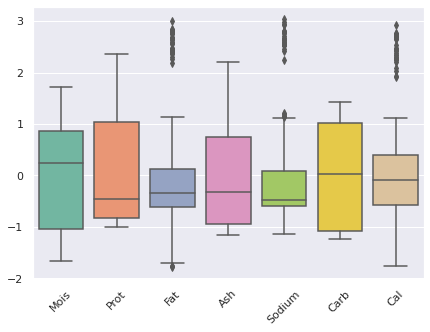

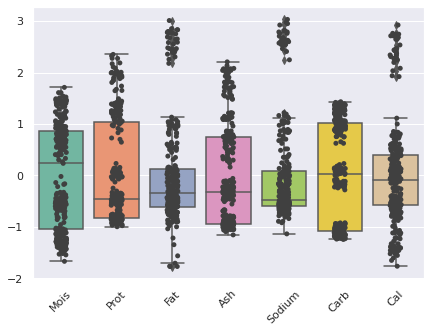

In [ ]:

ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

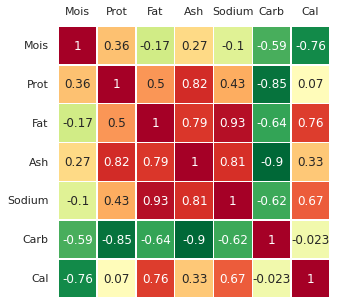

In [ ]:

ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')
     

# **Principal Component Analysis (PCA)**


Text(0, 0.5, '$Z_2$')

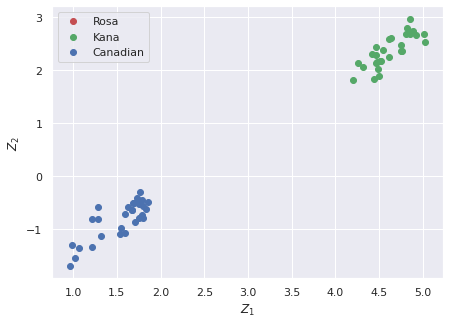

In [ ]:

pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

Text(0, 0.5, '$Z_2$')

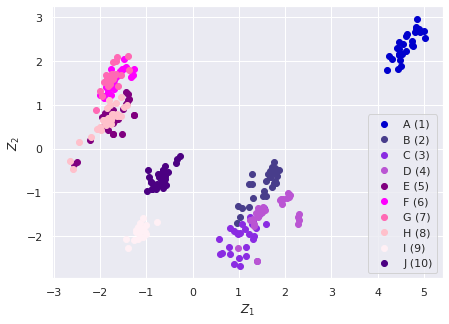

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

idx_A = np.where(y == 1)
idx_B = np.where(y == 2)
idx_C = np.where(y == 3)
idx_D = np.where(y == 4)
idx_E = np.where(y == 5)
idx_F = np.where(y == 6)
idx_G = np.where(y == 7)
idx_H = np.where(y == 8)
idx_I = np.where(y == 9)
idx_J = np.where(y == 10)

# Scatter Plot
plt. figure()
plt.scatter(Z[idx_A,0], Z[idx_A,1], c='mediumblue', label='A (1)')
plt.scatter(Z[idx_B,0], Z[idx_B,1], c='darkslateblue', label='B (2)')
plt.scatter(Z[idx_C,0], Z[idx_C,1], c='blueviolet', label='C (3)')
plt.scatter(Z[idx_D,0], Z[idx_D,1], c='mediumorchid', label='D (4)')
plt.scatter(Z[idx_E,0], Z[idx_E,1], c='purple', label='E (5)')
plt.scatter(Z[idx_F,0], Z[idx_F,1], c='magenta', label='F (6)')
plt.scatter(Z[idx_G,0], Z[idx_G,1], c='hotpink', label='G (7)')
plt.scatter(Z[idx_H,0], Z[idx_H,1], c='pink', label='H (8)')
plt.scatter(Z[idx_I,0], Z[idx_I,1], c='lavenderblush', label='I (9)')
plt.scatter(Z[idx_J,0], Z[idx_J,1], c='indigo', label='J (10)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

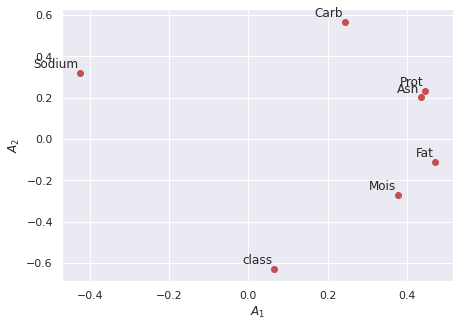

In [ ]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


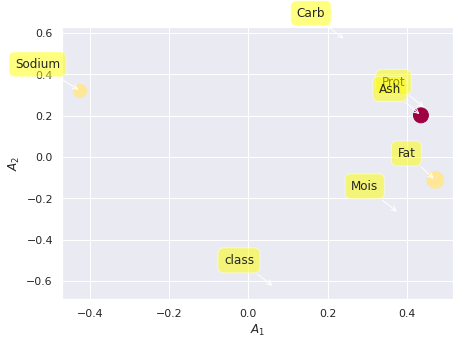

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

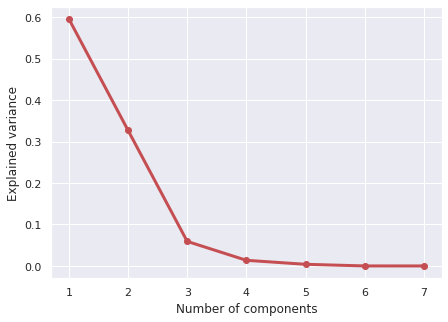

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained variance**

Text(0, 0.5, 'Cumulative explained variance')

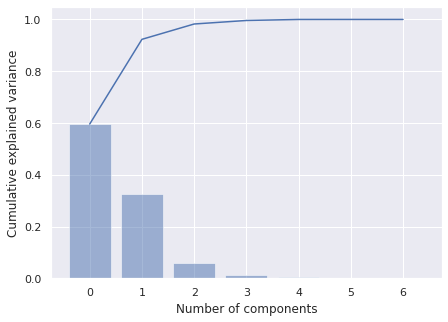

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

<ipython-input-26-c47e3564e48e>:23: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='bottom right')


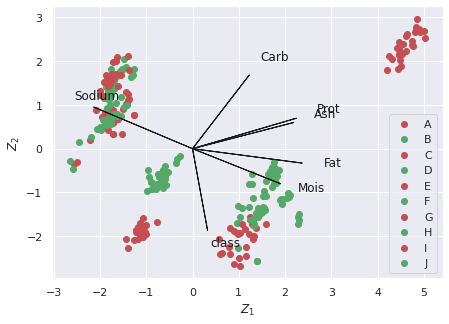

In [ ]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
plt.scatter(Z[idx_A,0], Z[idx_A,1], c='r', label='A')
plt.scatter(Z[idx_B,0], Z[idx_B,1], c='g', label='B')
plt.scatter(Z[idx_C,0], Z[idx_C,1], c='r', label='C')
plt.scatter(Z[idx_D,0], Z[idx_D,1], c='g', label='D')
plt.scatter(Z[idx_E,0], Z[idx_E,1], c='r', label='E')
plt.scatter(Z[idx_F,0], Z[idx_F,1], c='g', label='F')
plt.scatter(Z[idx_G,0], Z[idx_G,1], c='r', label='G')
plt.scatter(Z[idx_H,0], Z[idx_H,1], c='g', label='H')
plt.scatter(Z[idx_I,0], Z[idx_I,1], c='r', label='I')
plt.scatter(Z[idx_J,0], Z[idx_J,1], c='g', label='J')
plt.legend(loc='bottom right')

# **PCA libraries**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=34775847885939792a1a16b6418cddc7801f5c7fcab54cf2f0e7d2790a24618b
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=f0a7cf1a0e126e4780e7c0948fea25c81f71d7ffacc674829ffa15b9ffd6b759
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Component**

In [ ]:
out['PC']

PC1       PC2       PC3
0    5.010343  2.679215 -0.039327
1    5.023755  2.529295 -0.097056
2    4.805439  2.673700 -0.075475
3    4.469543  2.285029 -0.120233
4    4.471893  2.159152 -0.000738
..        ...       ...       ...
295 -0.535510 -0.530843 -0.426490
296 -0.339636 -0.243230 -0.281174
297 -0.646433 -0.515434 -0.370378
298 -0.865078 -0.921790 -0.493755
299 -0.895868 -0.767878 -0.530108

[300 rows x 3 columns]

**Scatter Plot**

[colourmap]> Warning: Colormap [Set1] can not create [300] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [300] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3c840a8a30>)

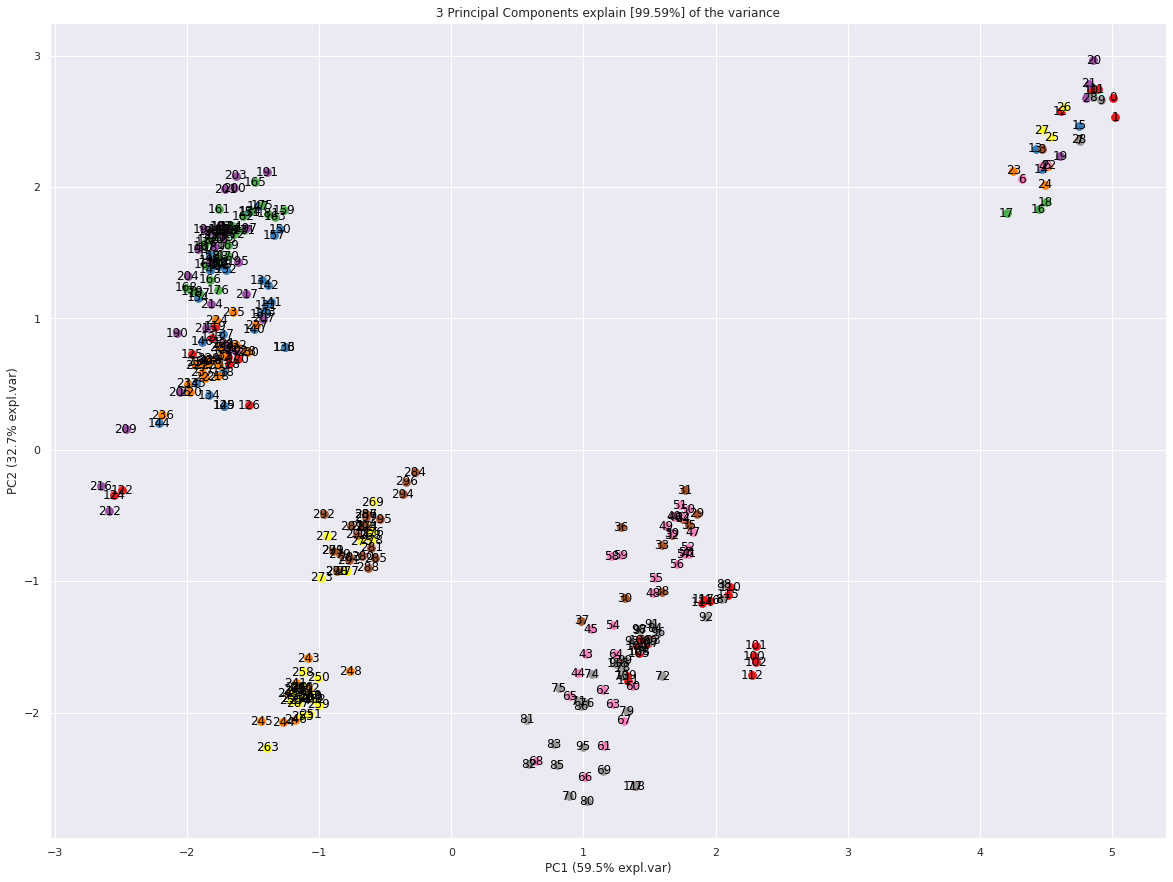

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors Matrix**

In [ ]:
A = out['loadings'].T
print(A)

             PC1       PC2       PC3
Mois    0.064709 -0.628276 -0.421669
Prot    0.378761 -0.269707  0.746027
Fat     0.446666  0.234379 -0.199309
Ash     0.471890 -0.110990  0.056273
Sodium  0.435703  0.201662 -0.455169
Carb   -0.424914  0.320312  0.052237
Cal     0.244487  0.567458  0.113316


**Eigenvectors plot**

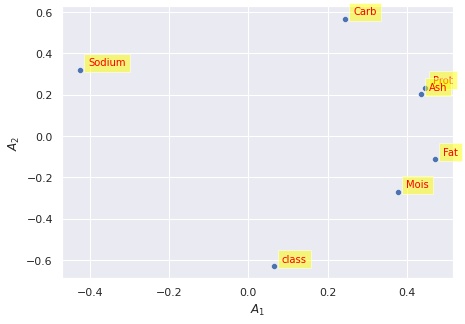

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

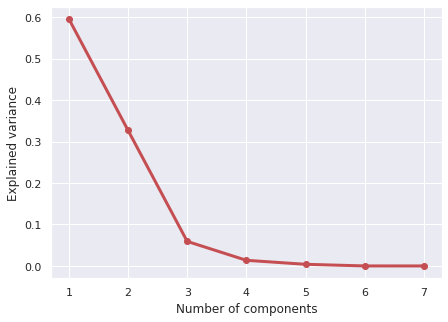

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

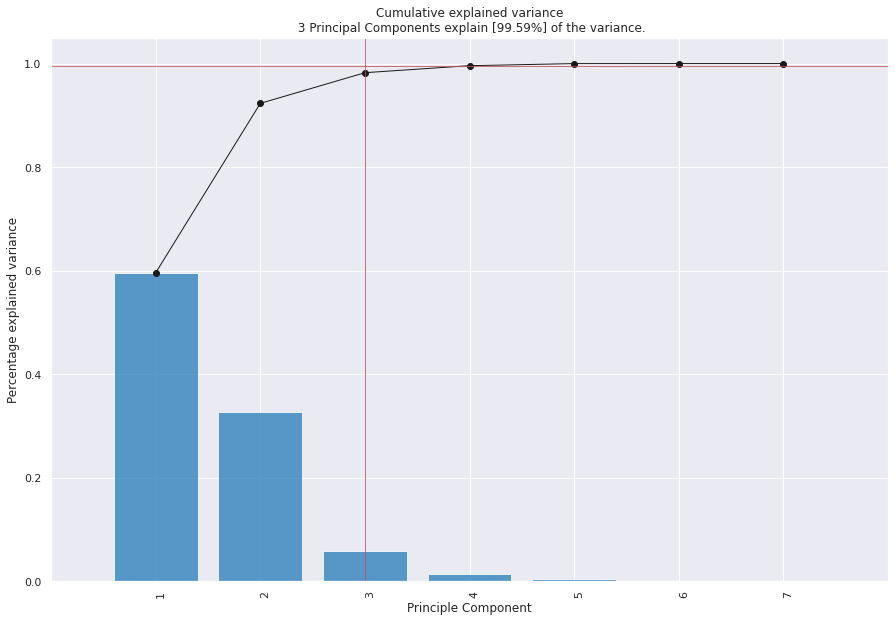

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [300] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [300] unique colors! Available unique colors: [9].


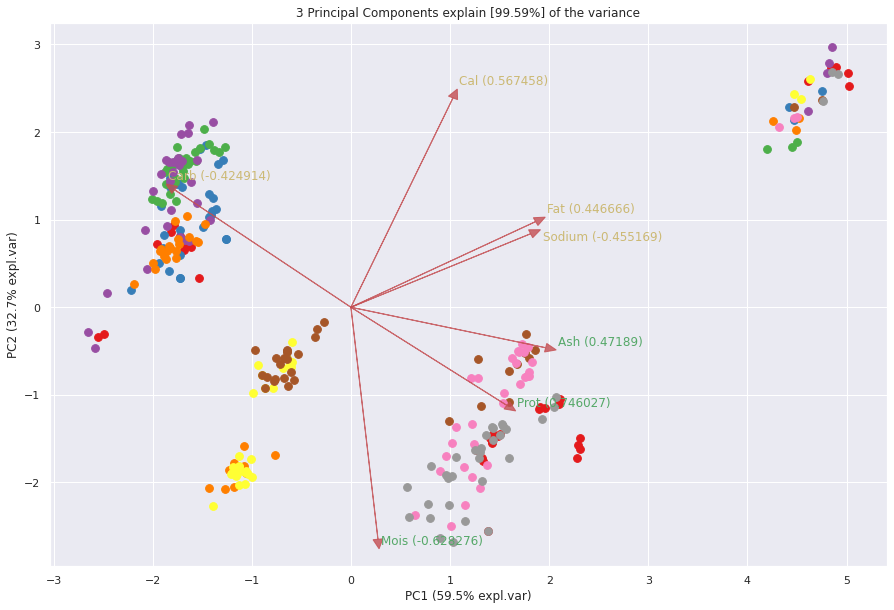

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3c8bc2d910>)

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [300] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [300] unique colors! Available unique colors: [9].


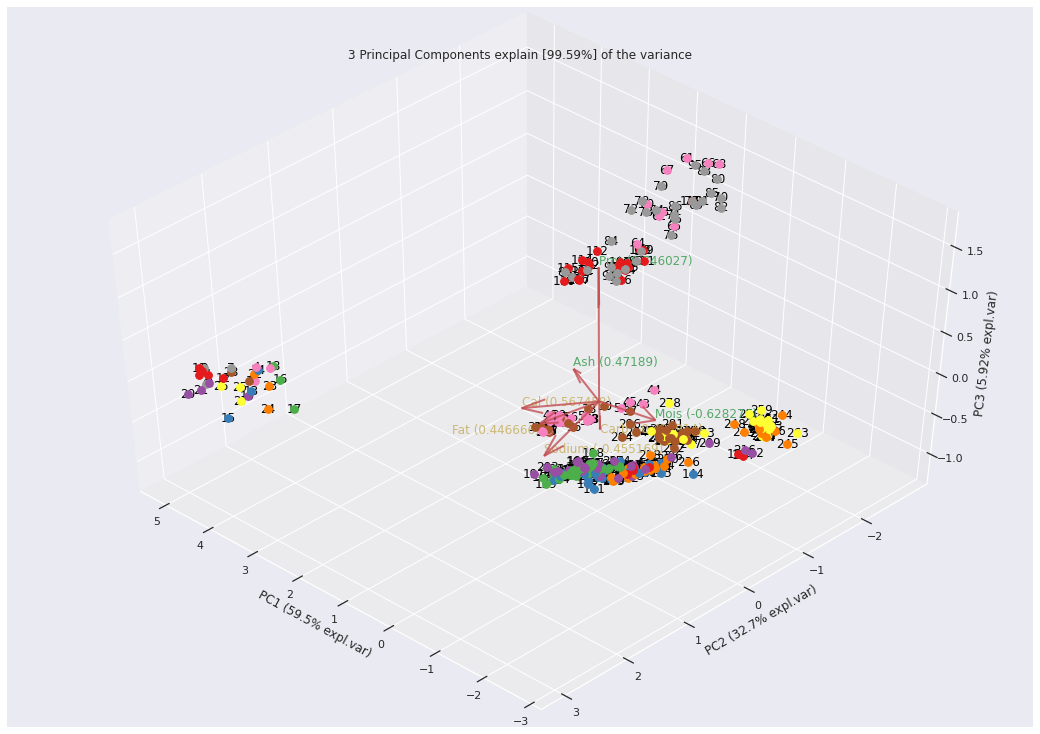

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f3c86a58b50>)

In [ ]:
model.biplot3d(legend=False)

# **Classification**

PyCaret makes use of interactive plotting. Run the following line of code in your Google Colab notebook to render interactive plots.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


To demonstrate the prediction model() function on unseen data, a sample of 30 observations from the original dataset was withdrawn to be used for predictions. This is not the same as a train/test split because this split is used to simulate a real-world scenario. Another way to look at it is that these 30 records were not available at the time of the machine-learning experiment. The rest of observation (270), are used for data modeing.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (270, 8)
Unseen Data For Predictions: (30, 8)


**Setting up the Environment in PyCaret**

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (270, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (188, 7)
12                    Transformed Test Set           (82, 7)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              87a9
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9044  0.9918  0.9100  0.9126   
rf               Random Forest Classifier    0.8991  0.9958  0.9050  0.9047   
et                 Extra Trees Classifier    0.8936  0.9922  0.9000  0.9028   
nb                            Naive Bayes    0.8827  0.9903  0.8900  0.8934   
lr                    Logistic Regression    0.8822  0.9862  0.8900  0.8919   
lda          Linear Discriminant Analysis    0.8775  0.9879  0.8850  0.8750   
knn                K Neighbors Classifier    0.8725  0.9811  0.8800  0.8762   
gbc          Gradient Boosting Classifier    0.8512  0.9862  0.8600  0.8509   
dt               Decision Tree Classifier    0.8345  0.9079  0.8450  0.8229   
qda       Quadratic Discriminant Analysis    0.8137  0.9667  0.8217  0.7748   
ridge                    Ridge Classifier    0.6386  0.0000  0.6200  0.5327   
svm                   SVM - Linear Kernel    0.5740  0.0000  0.5650  0.4610   
ada                  Ada Boost Classifier    0.4632  0.8137  0.4550  0.3665   
dummy                    Dummy Classifier    0.1064  0.5000  0.1000  0.0113   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.8956  0.8933  0.8978     0.134  
rf        0.8854  0.8876  0.8939     0.310  
et        0.8837  0.8814  0.8863     0.134  
nb        0.8755  0.8693  0.8733     0.028  
lr        0.8748  0.8686  0.8723     0.992  
lda       0.8619  0.8634  0.8696     0.015  
knn       0.8591  0.8579  0.8638     0.070  
gbc       0.8386  0.8342  0.8416     0.750  
dt        0.8126  0.8156  0.8235     0.029  
qda       0.7729  0.7924  0.8071     0.042  
ridge     0.5606  0.5971  0.6245     0.020  
svm       0.4815  0.5241  0.5658     0.045  
ada       0.3807  0.4001  0.4968     0.147  
dummy     0.0205  0.0000  0.0000     0.011

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Creating Model**

The most particle function in PyCaret is creating a model, which is frequently the foundation for most PyCaret functionalities. This function, as the name implies, trains and evaluates a model using cross-validation with a fold parameter.

In this study, I choose **"Extra Tree"** as my first Classifier because of it's accuracy on my dataset.**"Naive Bayes"** Classifier and **"Ouadratic Discriminant Analysis"** classofier as a second and third Classifier.

**Create a Extra Three model**

In [ ]:
et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9474  1.0000  0.9500  0.9649  0.9439  0.9414  0.9443
1       0.8947  0.9907  0.9000  0.8421  0.8596  0.8827  0.8938
2       0.8947  0.9845  0.9000  0.9298  0.8877  0.8827  0.8882
3       0.8421  0.9783  0.8500  0.8596  0.8386  0.8241  0.8266
4       0.7895  0.9876  0.8000  0.7368  0.7544  0.7654  0.7751
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8947  0.9938  0.9000  0.8947  0.8947  0.8827  0.8827
7       0.8947  0.9938  0.9000  0.9386  0.8912  0.8824  0.8879
8       0.8333  0.9931  0.8500  0.8981  0.8259  0.8144  0.8229
9       0.9444  1.0000  0.9500  0.9630  0.9407  0.9379  0.9412
Mean    0.8936  0.9922  0.9000  0.9028  0.8837  0.8814  0.8863
SD      0.0582  0.0068  0.0548  0.0722  0.0658  0.0649  0.0627

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'et'. 
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Tuned Model:**

The tune model() function performs a random grid search of hyperparameters over a predefined search space. By default, it is set to optimise Accuracy, but this can be changed using the optimise parameter. This function automatically tunes a model's hyperparameters on a pre-defined search space and scores it using stratified cross-validation. The output shows a scoring grid with Accuracy, AUC, Recall, Precision, F1, and Kappa by fold.


In [ ]:
tuned_et = tune_model(et)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.9938  0.9000  0.9298  0.8877  0.8827  0.8882
1       0.8947  0.9845  0.9000  0.8421  0.8596  0.8827  0.8938
2       0.8947  0.9845  0.9000  0.8947  0.8947  0.8827  0.8827
3       0.7895  0.9752  0.8000  0.7895  0.7754  0.7654  0.7702
4       0.9474  0.9876  0.9500  0.9649  0.9439  0.9414  0.9443
5       0.9474  1.0000  0.9500  0.9649  0.9439  0.9414  0.9443
6       0.8947  0.9907  0.9000  0.8947  0.8947  0.8827  0.8827
7       0.8947  0.9876  0.9000  0.9386  0.8912  0.8824  0.8879
8       0.9444  0.9826  0.9500  0.9630  0.9407  0.9379  0.9412
9       0.9444  0.9931  0.9500  0.9630  0.9407  0.9379  0.9412
Mean    0.9047  0.9880  0.9100  0.9145  0.8973  0.8937  0.8976
SD      0.0454  0.0065  0.0436  0.0568  0.0495  0.0505  0.0500

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Extra Tree Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to Analyze Model Performance Using Different Plots

In [ ]:
evaluate_model(tuned_et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Light Gradient Boosting Machine Model**

In [ ]:
lightgbm = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9474  1.0000   0.950  0.9649  0.9439  0.9414  0.9443
1       0.9474  0.9938   0.950  0.9649  0.9439  0.9414  0.9443
2       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
3       0.8421  0.9628   0.850  0.8421  0.8246  0.8241  0.8318
4       0.8947  1.0000   0.900  0.8421  0.8596  0.8827  0.8938
5       0.8947  1.0000   0.900  0.9298  0.8877  0.8827  0.8882
6       0.8421  0.9845   0.850  0.8596  0.8386  0.8241  0.8266
7       0.8421  0.9876   0.850  0.8246  0.8316  0.8230  0.8255
8       0.8889  0.9931   0.900  0.9352  0.8852  0.8763  0.8824
9       0.9444  0.9965   0.950  0.9630  0.9407  0.9379  0.9412
Mean    0.9044  0.9918   0.910  0.9126  0.8956  0.8933  0.8978
SD      0.0515  0.0110   0.049  0.0608  0.0561  0.0575  0.0562

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


**Tune light gradient boosting machine Model**

In [ ]:
tuned_lightgbm = tune_model(lightgbm)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.9752   0.900  0.9298  0.8877  0.8827  0.8882
1       0.8947  1.0000   0.900  0.8421  0.8596  0.8827  0.8938
2       0.9474  0.9938   0.950  0.9649  0.9439  0.9414  0.9443
3       0.8421  0.9505   0.850  0.8070  0.8035  0.8241  0.8371
4       0.8421  0.9969   0.850  0.8070  0.8035  0.8241  0.8371
5       0.9474  0.9969   0.950  0.9649  0.9439  0.9414  0.9443
6       0.8421  0.9907   0.850  0.8772  0.8491  0.8241  0.8266
7       0.9474  0.9938   0.950  0.9649  0.9439  0.9410  0.9439
8       0.8889  0.9931   0.900  0.9352  0.8852  0.8763  0.8824
9       0.8333  1.0000   0.800  0.8333  0.8037  0.8131  0.8218
Mean    0.8880  0.9891   0.890  0.8926  0.8724  0.8751  0.8819
SD      0.0447  0.0145   0.049  0.0631  0.0553  0.0499  0.0474

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Light gradient boosting machine Model**

In [ ]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  1.0000  0.9000  0.9298  0.8877  0.8827  0.8882
1       0.8947  0.9876  0.9000  0.8421  0.8596  0.8827  0.8938
2       0.8947  0.9969  0.9000  0.9298  0.8877  0.8827  0.8882
3       0.8421  0.9876  0.8500  0.8070  0.8035  0.8241  0.8371
4       0.8421  1.0000  0.8500  0.8070  0.8035  0.8241  0.8371
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8947  0.9938  0.9000  0.8947  0.8947  0.8827  0.8827
7       0.8947  0.9954  0.9000  0.9386  0.8912  0.8824  0.8879
8       0.8889  0.9965  0.9000  0.9352  0.8852  0.8763  0.8824
9       0.9444  1.0000  0.9500  0.9630  0.9407  0.9379  0.9412
Mean    0.8991  0.9958  0.9050  0.9047  0.8854  0.8876  0.8939
SD      0.0435  0.0046  0.0415  0.0624  0.0551  0.0485  0.0451

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Create Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.9938   0.900  0.9298  0.8877  0.8827  0.8882
1       0.8947  0.9845   0.900  0.8421  0.8596  0.8827  0.8938
2       1.0000  0.9969   1.000  1.0000  1.0000  1.0000  1.0000
3       0.7895  0.9814   0.800  0.7895  0.7754  0.7654  0.7702
4       0.7895  1.0000   0.800  0.7719  0.7474  0.7654  0.7800
5       0.9474  1.0000   0.950  0.9649  0.9439  0.9414  0.9443
6       0.8947  0.9876   0.900  0.8947  0.8947  0.8827  0.8827
7       0.8947  0.9938   0.900  0.8421  0.8596  0.8820  0.8932
8       0.9444  0.9931   0.950  0.9630  0.9407  0.9379  0.9412
9       0.9444  0.9931   0.950  0.9630  0.9407  0.9379  0.9412
Mean    0.8994  0.9924   0.905  0.8961  0.8850  0.8878  0.8935
SD      0.0638  0.0059   0.061  0.0763  0.0743  0.0711  0.0683

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random forest Model**

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.9752   0.900  0.9298  0.8877  0.8827  0.8882
1       0.8947  1.0000   0.900  0.8421  0.8596  0.8827  0.8938
2       0.9474  0.9938   0.950  0.9649  0.9439  0.9414  0.9443
3       0.8421  0.9505   0.850  0.8070  0.8035  0.8241  0.8371
4       0.8421  0.9969   0.850  0.8070  0.8035  0.8241  0.8371
5       0.9474  0.9969   0.950  0.9649  0.9439  0.9414  0.9443
6       0.8421  0.9907   0.850  0.8772  0.8491  0.8241  0.8266
7       0.9474  0.9938   0.950  0.9649  0.9439  0.9410  0.9439
8       0.8889  0.9931   0.900  0.9352  0.8852  0.8763  0.8824
9       0.8333  1.0000   0.800  0.8333  0.8037  0.8131  0.8218
Mean    0.8880  0.9891   0.890  0.8926  0.8724  0.8751  0.8819
SD      0.0447  0.0145   0.049  0.0631  0.0553  0.0499  0.0474

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**


In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (270, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (188, 3)
12                    Transformed Test Set           (82, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              5fe7
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes    0.8883  0.9887  0.8950  0.8970   
et                 Extra Trees Classifier    0.8883  0.9924  0.8950  0.9075   
qda       Quadratic Discriminant Analysis    0.8877  0.9892  0.8967  0.9000   
rf               Random Forest Classifier    0.8775  0.9908  0.8850  0.8871   
lda          Linear Discriminant Analysis    0.8772  0.9879  0.8850  0.8897   
dt               Decision Tree Classifier    0.8725  0.9292  0.8750  0.8944   
knn                K Neighbors Classifier    0.8670  0.9859  0.8750  0.8729   
lightgbm  Light Gradient Boosting Machine    0.8617  0.9887  0.8700  0.8699   
gbc          Gradient Boosting Classifier    0.8567  0.9775  0.8650  0.8893   
lr                    Logistic Regression    0.8196  0.9807  0.8300  0.8021   
svm                   SVM - Linear Kernel    0.7284  0.0000  0.7167  0.6621   
ridge                    Ridge Classifier    0.5219  0.0000  0.5100  0.3582   
ada                  Ada Boost Classifier    0.4731  0.8380  0.4550  0.3712   
dummy                    Dummy Classifier    0.1064  0.5000  0.1000  0.0113   

              F1   Kappa     MCC  TT (Sec)  
nb        0.8737  0.8755  0.8823     0.014  
et        0.8807  0.8755  0.8801     0.133  
qda       0.8805  0.8749  0.8791     0.014  
rf        0.8680  0.8635  0.8684     0.157  
lda       0.8698  0.8631  0.8670     0.013  
dt        0.8661  0.8580  0.8629     0.013  
knn       0.8569  0.8516  0.8563     0.022  
lightgbm  0.8480  0.8459  0.8521     0.080  
gbc       0.8508  0.8404  0.8463     0.493  
lr        0.7987  0.7990  0.8060     0.035  
svm       0.6679  0.6968  0.7171     0.018  
ridge     0.4046  0.4666  0.5029     0.012  
ada       0.3854  0.4074  0.4803     0.068  
dummy     0.0205  0.0000  0.0000     0.012

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:compare_models() succesfully completed......................................


**Creating Model After PCA**

The most particle function in PyCaret is creating a model, which is frequently the foundation for most PyCaret functionalities. This function, as the name implies, trains and evaluates a model using cross-validation with a fold parameter.

In this study, I choose "Extra Tree" as my first Classifier because of it's accuracy on my dataset."Naive Bayes" Classifier and "Ouadratic Discriminant Analysis" classofier as a second and third Classifier.

In [ ]:
best_model_pca

GaussianNB(priors=None, var_smoothing=1e-09)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9907    0.85  0.8947  0.8316  0.8241  0.8318
1       0.8947  0.9752    0.90  0.8421  0.8596  0.8827  0.8938
2       0.9474  0.9876    0.95  0.9649  0.9439  0.9414  0.9443
3       0.8421  0.9752    0.85  0.8596  0.8386  0.8241  0.8266
4       0.8421  0.9876    0.85  0.8947  0.8316  0.8241  0.8318
5       0.8947  1.0000    0.90  0.9298  0.8877  0.8827  0.8882
6       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
7       0.9474  0.9876    0.95  0.9649  0.9439  0.9410  0.9439
8       0.8333  0.9792    0.85  0.7963  0.7926  0.8138  0.8282
9       0.8889  1.0000    0.90  0.8333  0.8519  0.8759  0.8882
Mean    0.8933  0.9883    0.90  0.8981  0.8781  0.8810  0.8877
SD      0.0536  0.0092    0.05  0.0629  0.0615  0.0597  0.0570

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GaussianNB(priors=None, var_smoothing=0.002)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

GaussianNB(priors=None, var_smoothing=0.002)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=0.002), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note**: The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

**Create second best model-Extratrees**

In [ ]:
et_pca = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9659  0.8500  0.8947  0.8316  0.8241  0.8318
1       0.8947  1.0000  0.9000  0.9386  0.8912  0.8831  0.8885
2       0.8947  0.9845  0.9000  0.8947  0.8947  0.8827  0.8827
3       0.8421  0.9830  0.8500  0.8596  0.8386  0.8241  0.8266
4       0.8421  1.0000  0.8500  0.8947  0.8316  0.8241  0.8318
5       0.8947  0.9938  0.9000  0.8947  0.8947  0.8827  0.8827
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8947  1.0000  0.9000  0.9386  0.8912  0.8824  0.8879
8       0.8333  1.0000  0.8500  0.7963  0.7926  0.8138  0.8282
9       0.9444  0.9965  0.9500  0.9630  0.9407  0.9379  0.9412
Mean    0.8883  0.9924  0.8950  0.9075  0.8807  0.8755  0.8801
SD      0.0502  0.0108  0.0472  0.0537  0.0573  0.0560  0.0534

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_et_pca = tune_model(et_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9969  0.8500  0.8947  0.8316  0.8241  0.8318
1       0.8421  0.9845  0.8500  0.8158  0.8070  0.8246  0.8376
2       0.8947  0.9938  0.9000  0.9298  0.8877  0.8827  0.8882
3       0.8947  0.9845  0.9000  0.9298  0.8877  0.8827  0.8882
4       0.8947  0.9876  0.9000  0.9298  0.8877  0.8827  0.8882
5       0.9474  1.0000  0.9500  0.9649  0.9439  0.9414  0.9443
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8947  0.9907  0.9000  0.9386  0.8912  0.8824  0.8879
8       0.8889  0.9931  0.9000  0.9259  0.8815  0.8759  0.8820
9       0.9444  0.9896  0.9500  0.9630  0.9407  0.9379  0.9412
Mean    0.9044  0.9921  0.9100  0.9292  0.8959  0.8934  0.8989
SD      0.0458  0.0054  0.0436  0.0465  0.0526  0.0509  0.0480

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Extratrees after PCA**

In [ ]:
evaluate_model(tuned_et_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Third best model-Quadratuc discriminant**

In [ ]:
qda_pca = create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9474  0.9938  0.9500  0.9649  0.9439  0.9414  0.9443
1       0.7895  0.9752  0.8000  0.7982  0.7789  0.7662  0.7709
2       0.8421  0.9876  0.8500  0.8596  0.8386  0.8241  0.8266
3       0.8421  0.9814  0.8500  0.8596  0.8386  0.8241  0.8266
4       0.9474  0.9876  0.9500  0.9649  0.9439  0.9414  0.9443
5       0.9474  1.0000  0.9500  0.9649  0.9439  0.9414  0.9443
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8947  0.9876  0.9167  0.9298  0.8912  0.8824  0.8879
8       0.7778  0.9861  0.8000  0.8241  0.7741  0.7526  0.7578
9       0.8889  0.9931  0.9000  0.8333  0.8519  0.8759  0.8882
Mean    0.8877  0.9892  0.8967  0.9000  0.8805  0.8749  0.8791
SD      0.0702  0.0074  0.0653  0.0688  0.0724  0.0780  0.0771

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_qda_pca = tune_model(qda_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9783  0.8500  0.8070  0.8035  0.8241  0.8371
1       0.7368  0.9845  0.7500  0.6842  0.7000  0.7086  0.7197
2       0.7895  0.9814  0.8000  0.7895  0.7754  0.7654  0.7702
3       0.8421  0.9721  0.8500  0.8070  0.8035  0.8241  0.8371
4       0.7895  0.9845  0.8000  0.7719  0.7474  0.7654  0.7800
5       0.8421  0.9814  0.8500  0.8070  0.8035  0.8241  0.8371
6       1.0000  0.9938  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8421  0.9845  0.8000  0.7544  0.7860  0.8224  0.8356
8       0.7778  0.9722  0.8000  0.7778  0.7630  0.7517  0.7570
9       0.8889  0.9931  0.9000  0.8889  0.8889  0.8759  0.8759
Mean    0.8351  0.9826  0.8400  0.8088  0.8071  0.8162  0.8250
SD      0.0688  0.0070  0.0663  0.0801  0.0790  0.0765  0.0738

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Quadratic discriminant after PCA**

In [ ]:
evaluate_model(tuned_qda_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Explainable AI with Shapley values**



In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print("Numpy version: ", np.__version__)

Numpy version:  1.21.6


In [ ]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
et_pca = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9659  0.8500  0.8947  0.8316  0.8241  0.8318
1       0.8947  1.0000  0.9000  0.9386  0.8912  0.8831  0.8885
2       0.8947  0.9845  0.9000  0.8947  0.8947  0.8827  0.8827
3       0.8421  0.9830  0.8500  0.8596  0.8386  0.8241  0.8266
4       0.8421  1.0000  0.8500  0.8947  0.8316  0.8241  0.8318
5       0.8947  0.9938  0.9000  0.8947  0.8947  0.8827  0.8827
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8947  1.0000  0.9000  0.9386  0.8912  0.8824  0.8879
8       0.8333  1.0000  0.8500  0.7963  0.7926  0.8138  0.8282
9       0.9444  0.9965  0.9500  0.9630  0.9407  0.9379  0.9412
Mean    0.8883  0.9924  0.8950  0.9075  0.8807  0.8755  0.8801
SD      0.0502  0.0108  0.0472  0.0537  0.0573  0.0560  0.0534

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_et_pca = tune_model(et_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9969  0.8500  0.8947  0.8316  0.8241  0.8318
1       0.8421  0.9845  0.8500  0.8158  0.8070  0.8246  0.8376
2       0.8947  0.9938  0.9000  0.9298  0.8877  0.8827  0.8882
3       0.8947  0.9845  0.9000  0.9298  0.8877  0.8827  0.8882
4       0.8947  0.9876  0.9000  0.9298  0.8877  0.8827  0.8882
5       0.9474  1.0000  0.9500  0.9649  0.9439  0.9414  0.9443
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8947  0.9907  0.9000  0.9386  0.8912  0.8824  0.8879
8       0.8889  0.9931  0.9000  0.9259  0.8815  0.8759  0.8820
9       0.9444  0.9896  0.9500  0.9630  0.9407  0.9379  0.9412
Mean    0.9044  0.9921  0.9100  0.9292  0.8959  0.8934  0.8989
SD      0.0458  0.0054  0.0436  0.0465  0.0526  0.0509  0.0480

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


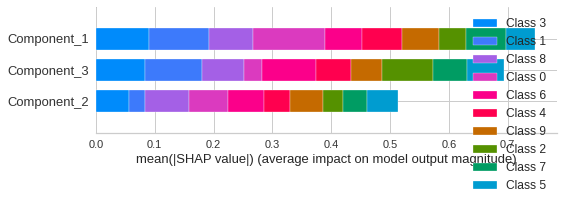

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_et_pca, plot='summary')

**Visualize single model**

In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_et_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
